# <span style="color:green"> Laboratorio di simulazione numerica </span>
### Martina Colombo, 977556
## <span style="color:blue">  Esercitazione 4</span>

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

In [4]:
params = {'font.size':18, 'legend.fontsize': 'large' ,'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Esercizio 04.1

In questa esercitazione ci viene fornito un codice di dinamica molecolare (MD) che legge le configurazioni spaziali di $N$ particelle contenute in una scatola avente un certo volume interagenti tramite un potenziale di tipo Lennard-Jones. Il codice risolve le equazioni del moto delle particelle tramite l'algoritmo di integrazione di Verlet da cui vengono ricavate le posizioni al tempo successivo $\vec{r}(t+\delta t)$ tramite : 

$$\vec{r}(t+\delta t)=2\vec{r}(t)-\vec{r}(t-\delta t)+\delta t^2 \vec{a}(t) $$

Per poter utilizzare questo algoritmo  è necessario non soltanto conoscere le posizioni delle $N$ particelle al tempo iniziale $t$, ma anche le posizioni al tempo precedente $t-\delta t$, non potendo conoscere a priori questa quantità è necessario inizializzare il valore delle posizioni al tempo precedente in maniera casuale. A questo scopo il codice genera $N$ velocità casuali comprese tra $-0.5$ e $0.5$, le riscala facendo in modo che la velocità del centro di massa del sistema sia nulla così da non avere moti di deriva. A questo punto le velocità devono essere ulteriormente riscalate in modo che siano adeguate alla temperatura target $T$ del sistema, viene dunque calcolato il fattore di scala $f_s$ ricavato tramite il principio di equipartizione dell'energia, dato da $f_s = \sqrt{\frac{3\cdot T}{\sum_{i=1}^{N}{v^2}}}$, dalle velocità riscalate è possibile calcolare le posizioni al tempo precedente tramite $\vec{r}(t-\delta t)=\vec{r}(t)-\vec v(t-t-\delta t)\delta t$ utilizzando le condizioni periodiche al contorno. Poichè queste posizioni non sono compatibili con l'algoritmo di Verlet vediamo che nei primi passi della simulazione l'energia non viene conservata. Per ovviare a questo problema ci viene richiesto di implementare un $restart$ in cui il codice sia in grado stampare su due file $old.0$ e $old.final$ rispettivamente le posizioni attuali e le posizioni al tempo precedente e di poter decidere di leggerle in una simulazione successiva inserendo una variabile di tipo booleano nel file di input. In questo modo quello che ci aspettiamo è di ottenere una buona conservazione dell'energia già dai primi passi della simulazione.


Le operazioni che vengono eseguite una volta che il restart è abilitato sono:
1. leggere le posizioni $\vec{r}(t)$ e $\vec{r}(t-dt)$ da $old.0$ e $old.final$
2. calcolare $\vec{r}(t+dt)$ tramite l'algoritmo di Verlet, con $\vec{r}(t+dt)$ e $\vec{r}(t)$ calcolare $\vec{v}(t+dt/2)=\frac{\vec{r}(t+dt)-\vec{r}(t)}{2\delta t}$ da cui è possibile ottenere il fattore di scala $f_s$
3. riscalare le velocità utilizzando $f_s$: $\vec{v}(t) \to \vec{v}_s(t)$
4. usare le velocità riscalate $\vec{v}_s(t)$ per stimare una nuova configurazione al tempo attuale $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. utilizzare $\vec{r}_{new}(t)$ e $\vec{r}(t+dt)$ per iniziare la simulazione
6. stampare le configurazioni attuali e al tempo precedente in  $old.0$ e $old.final$

### Esercizio 04.2

Integriamo nel codice di dinamica molecolare la possibilità di calcolare la media a blocchi dell'energia per particella $E/N$, dell'energia potenziale per particella $U/N$, dell'energia cinetica per particella $K/N$ e della temperatura $T$ del sistema. I valori delle media a blocchi vengono salvati nei file <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>.

### Esercizio 04.3

A questo punto utilizziamo il codice di dinamica molecolare modificato come descritto in precedenza per equilibrare e simulare un insieme di atomi di Argon ($m=39.948$ amu) che interagiscono tramite un potenziale di tipo Lennard-Jones: 
$$ v_{LJ}=4\epsilon \biggl[\biggl(\frac{\sigma}{r}\biggr)^{12}-\biggl(\frac{\sigma}{r}\biggr)^6 \biggr]$$
con $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, nelle seguenti condizioni:
1. **Fase solida**: densità $\rho^\star = 1.1$, temperatura $T^\star = 0.8$, raggio di cut-off: $r_c = 2.2$
2. **Fase liquida**: densità $\rho^\star = 0.8$, temperatura $T^\star = 1.1$, raggio di cut-off: $r_c = 2.5$
3. **Fase gassosa**: densità $\rho^\star = 0.05$, temperatura $T^\star = 1.2$, raggio di cut-off: $r_c = 5.0$

N.B: l'introduzione di un raggio di cut-off per il potenziale corrisponde ad ignorare le interazione tra particelle che hanno distanza superiori a $r_c$, questa approssimazione è giustificata dal fatto che la maggior parte del contributo al potenziale e alle forze è data dalle particelle vicine a quella di interesse e non ad interazioni a lunghe distranze.

Per ogni fase del sistema facciamo una prima simulazione in cui il restart è disattivato, utilizziamo dunque il metodo casuale per il calolo delle posizioni $\vec{r}(t-\delta t)$. Una volta finita questa prima simulazione otteniamo i file $old.0$ e $old.final$, attiviamo il restart e facciamo altre simulazioni che ci permettono di equilibrare il sistema. Avere un sistema equilibrato significa essere in una condizione per cui le osservabili del sistema non variano in modo apprezzabile nel tempo. Una volta equilibrato il sistema calcoliamo le media a blocchi delle quantità di interesse.

#### 1. Fase Solida 

Per la fase solida partiamo da una configurazione iniziale letta da $config.0$ che corrisponde a quella di un reticolo cubico $fcc$. Per prima cosa equilibriamo il sistema mediante una serie di restart. Vediamo che nel caso in cui il restart non è abilitato il sistema ci mette del tempo prima di equilibrare, infatti nei primi passi della simulazione è visibile un salto nei valori dell'energia cinetica e dell'energia potenziale, la temperatura invece ha un valore molto diverso rispetto a quello target. Man mano che aumentano i restart vediamo come il salto nei valori delle energie sia sempre meno visibile e come il valore della temperatura già dal $3°$ restart sia vicino a quello target del sistema.


N.B: nei grafici riportiamo i valori delle osservabili in unità del Sistema Internazionale.

In [5]:
#Per il sistema internazionale: le energie vanno moltiplicate per epsilon, i tempi per sqrt(m*sigma^2/epsilon)
epsilon_kb=120
kb=1.38065*10**(-23)
epsilon=epsilon_kb*kb
mass=39.948*1.66*10**(-27)
sigma=0.34*10**(-9)
time=math.sqrt(mass*sigma**2/epsilon)

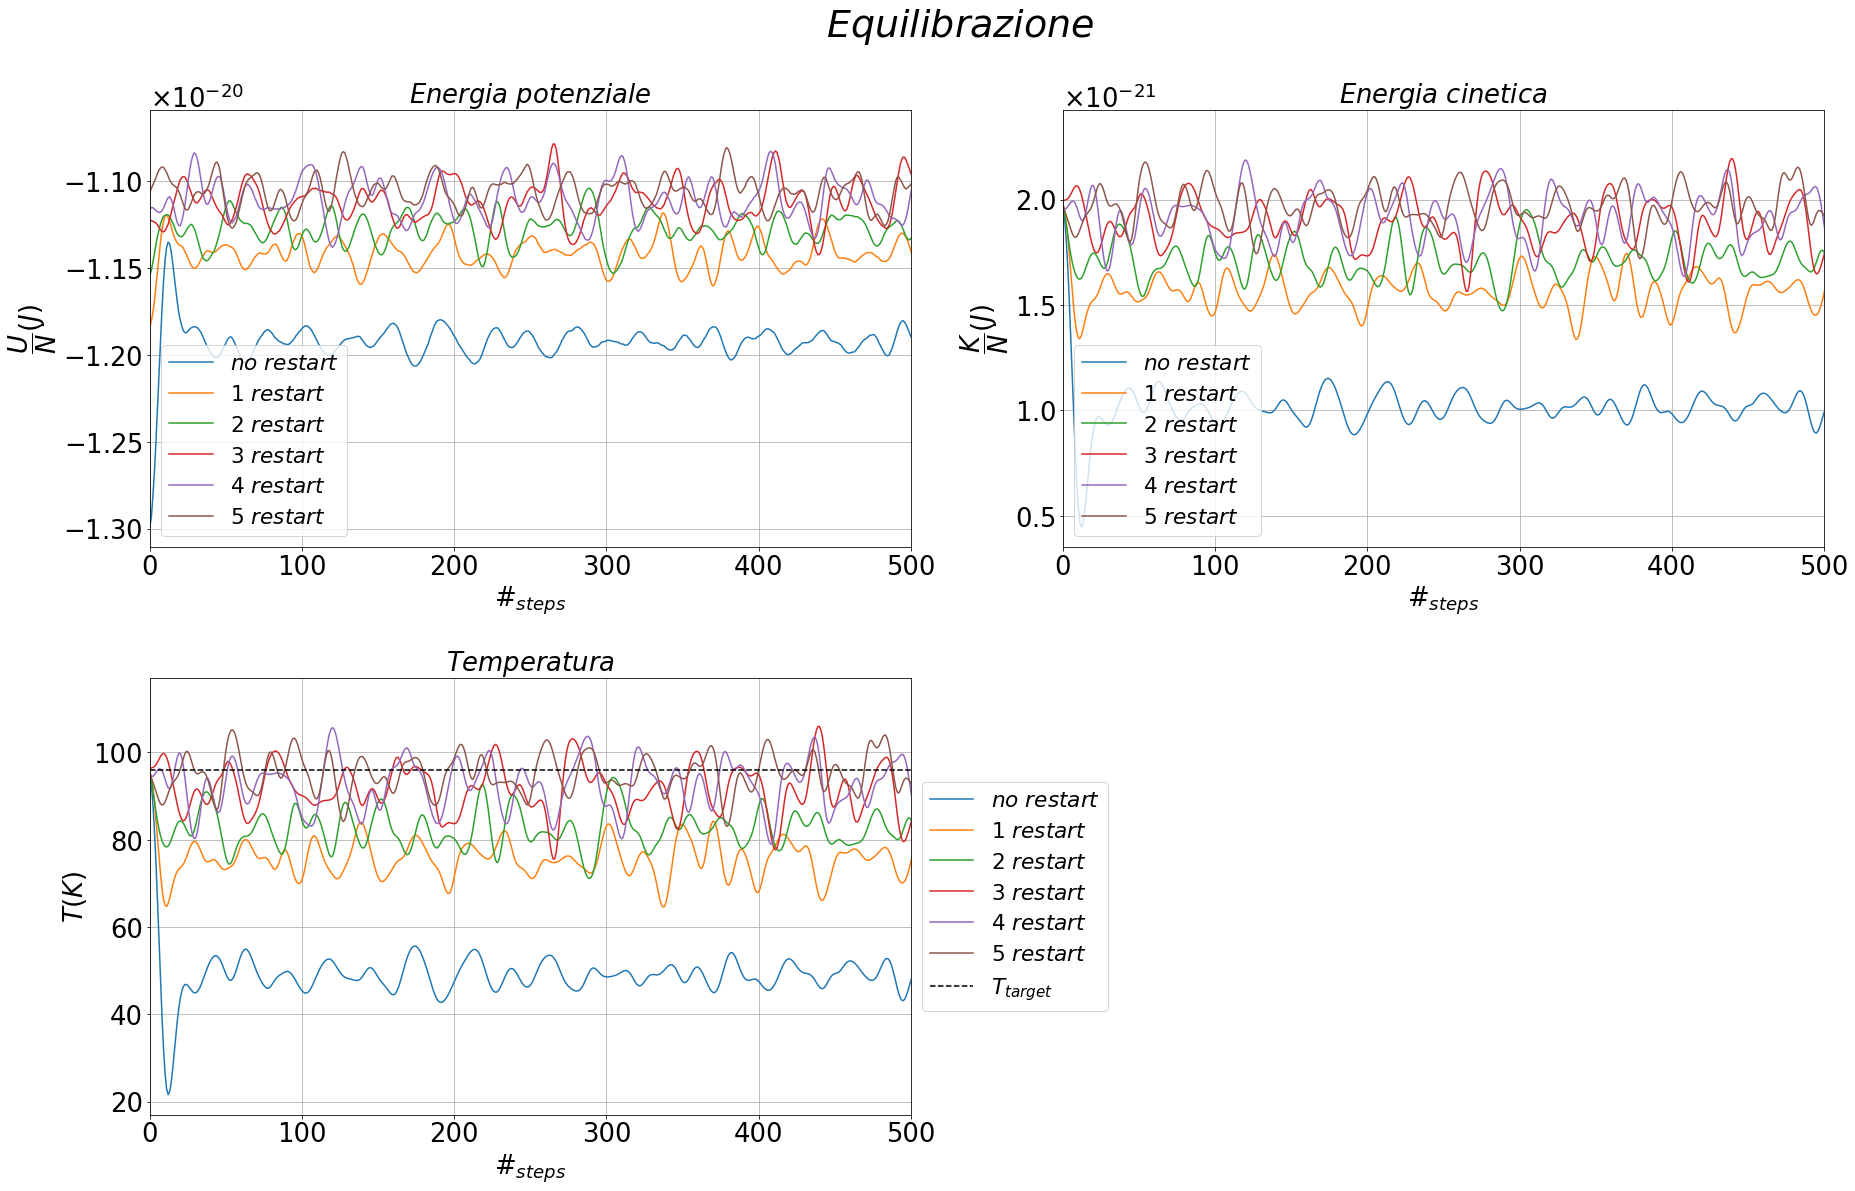

In [21]:
plt.figure(figsize=(30,18))

pot= np.loadtxt("MolecularDynamics/Solid/output_epot0.dat", usecols=(0), delimiter=' ', unpack='true')
pot1= np.loadtxt("MolecularDynamics/Solid/output_epot1.dat", usecols=(0), delimiter=' ', unpack='true')
pot2= np.loadtxt("MolecularDynamics/Solid/output_epot2.dat", usecols=(0), delimiter=' ', unpack='true')
pot3= np.loadtxt("MolecularDynamics/Solid/output_epot3.dat", usecols=(0), delimiter=' ', unpack='true')
pot4= np.loadtxt("MolecularDynamics/Solid/output_epot4.dat", usecols=(0), delimiter=' ', unpack='true')
pot5= np.loadtxt("MolecularDynamics/Solid/output_epot5.dat", usecols=(0), delimiter=' ', unpack='true')

kin= np.loadtxt("MolecularDynamics/Solid/output_ekin0.dat", usecols=(0), delimiter=' ', unpack='true')
kin1= np.loadtxt("MolecularDynamics/Solid/output_ekin1.dat", usecols=(0), delimiter=' ', unpack='true')
kin2= np.loadtxt("MolecularDynamics/Solid/output_ekin2.dat", usecols=(0), delimiter=' ', unpack='true')
kin3= np.loadtxt("MolecularDynamics/Solid/output_ekin3.dat", usecols=(0), delimiter=' ', unpack='true')
kin4= np.loadtxt("MolecularDynamics/Solid/output_ekin4.dat", usecols=(0), delimiter=' ', unpack='true')
kin5= np.loadtxt("MolecularDynamics/Solid/output_ekin5.dat", usecols=(0), delimiter=' ', unpack='true')

temp= np.loadtxt("MolecularDynamics/Solid/output_temp0.dat", usecols=(0), delimiter=' ', unpack='true')
temp1= np.loadtxt("MolecularDynamics/Solid/output_temp1.dat", usecols=(0), delimiter=' ', unpack='true')
temp2= np.loadtxt("MolecularDynamics/Solid/output_temp2.dat", usecols=(0), delimiter=' ', unpack='true')
temp3= np.loadtxt("MolecularDynamics/Solid/output_temp3.dat", usecols=(0), delimiter=' ', unpack='true')
temp4= np.loadtxt("MolecularDynamics/Solid/output_temp4.dat", usecols=(0), delimiter=' ', unpack='true')
temp5= np.loadtxt("MolecularDynamics/Solid/output_temp5.dat", usecols=(0), delimiter=' ', unpack='true')


plt.subplot(2,2,1)

plt.plot(pot*epsilon, label='$no$ $restart$')
plt.plot(pot1*epsilon, label='$1$ $restart$')
plt.plot(pot2*epsilon, label='$2$ $restart$')
plt.plot(pot3*epsilon, label='$3$ $restart$')
plt.plot(pot4*epsilon, label='$4$ $restart$')
plt.plot(pot5*epsilon, label='$5$ $restart$')


plt.xlabel("$\#_{steps}$")
plt.ylabel("$\\dfrac{U}{N}$$(J)$")
plt.title("$Energia$ $potenziale$")
plt.xlim(0,500)
plt.grid()
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)



plt.subplot(2,2,2)

plt.plot(kin*epsilon, label='$no$ $restart$')
plt.plot(kin1*epsilon, label='$1$ $restart$')
plt.plot(kin2*epsilon, label='$2$ $restart$')
plt.plot(kin3*epsilon, label='$3$ $restart$')
plt.plot(kin4*epsilon, label='$4$ $restart$')
plt.plot(kin5*epsilon, label='$5$ $restart$')


plt.xlabel("$\#_{steps}$")
plt.ylabel('$\\dfrac{K}{N}$$(J)$')
plt.title("$Energia$ $cinetica$")
plt.xlim(0,500)
plt.grid()
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)



plt.subplot(2,2,3)

plt.plot(temp*epsilon_kb, label='$no$ $restart$')
plt.plot(temp1*epsilon_kb, label='$1$ $restart$')
plt.plot(temp2*epsilon_kb, label='$2$ $restart$')
plt.plot(temp3*epsilon_kb, label='$3$ $restart$')
plt.plot(temp4*epsilon_kb, label='$4$ $restart$')
plt.plot(temp5*epsilon_kb, label='$5$ $restart$')


plt.axhline(y=0.8*epsilon_kb, label="$T_{target}$", color='black', linestyle='dashed')
plt.xlabel("$\#_{steps}$")
plt.ylabel('$T(K)$')
plt.title("$Temperatura$")
plt.grid()
plt.xlim(0,500)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)
plt.suptitle("$Equilibrazione$", fontsize=38)

plt.show()

Visto che l'equilibrazione del sistema sembra buona al quinto restart consideriamo i valori istantanei dell'energia potenziale, dell'energia cinetica, dell'energia totale e della temperatura ottenuti tramite questa simulazione per calcolare le medie a blocchi. Riportiamo di seguito i risultati ottenuti utilizzando $M=10^5$ passi per la simulazione e $\#_{blocks}=100$ numero di blocchi.

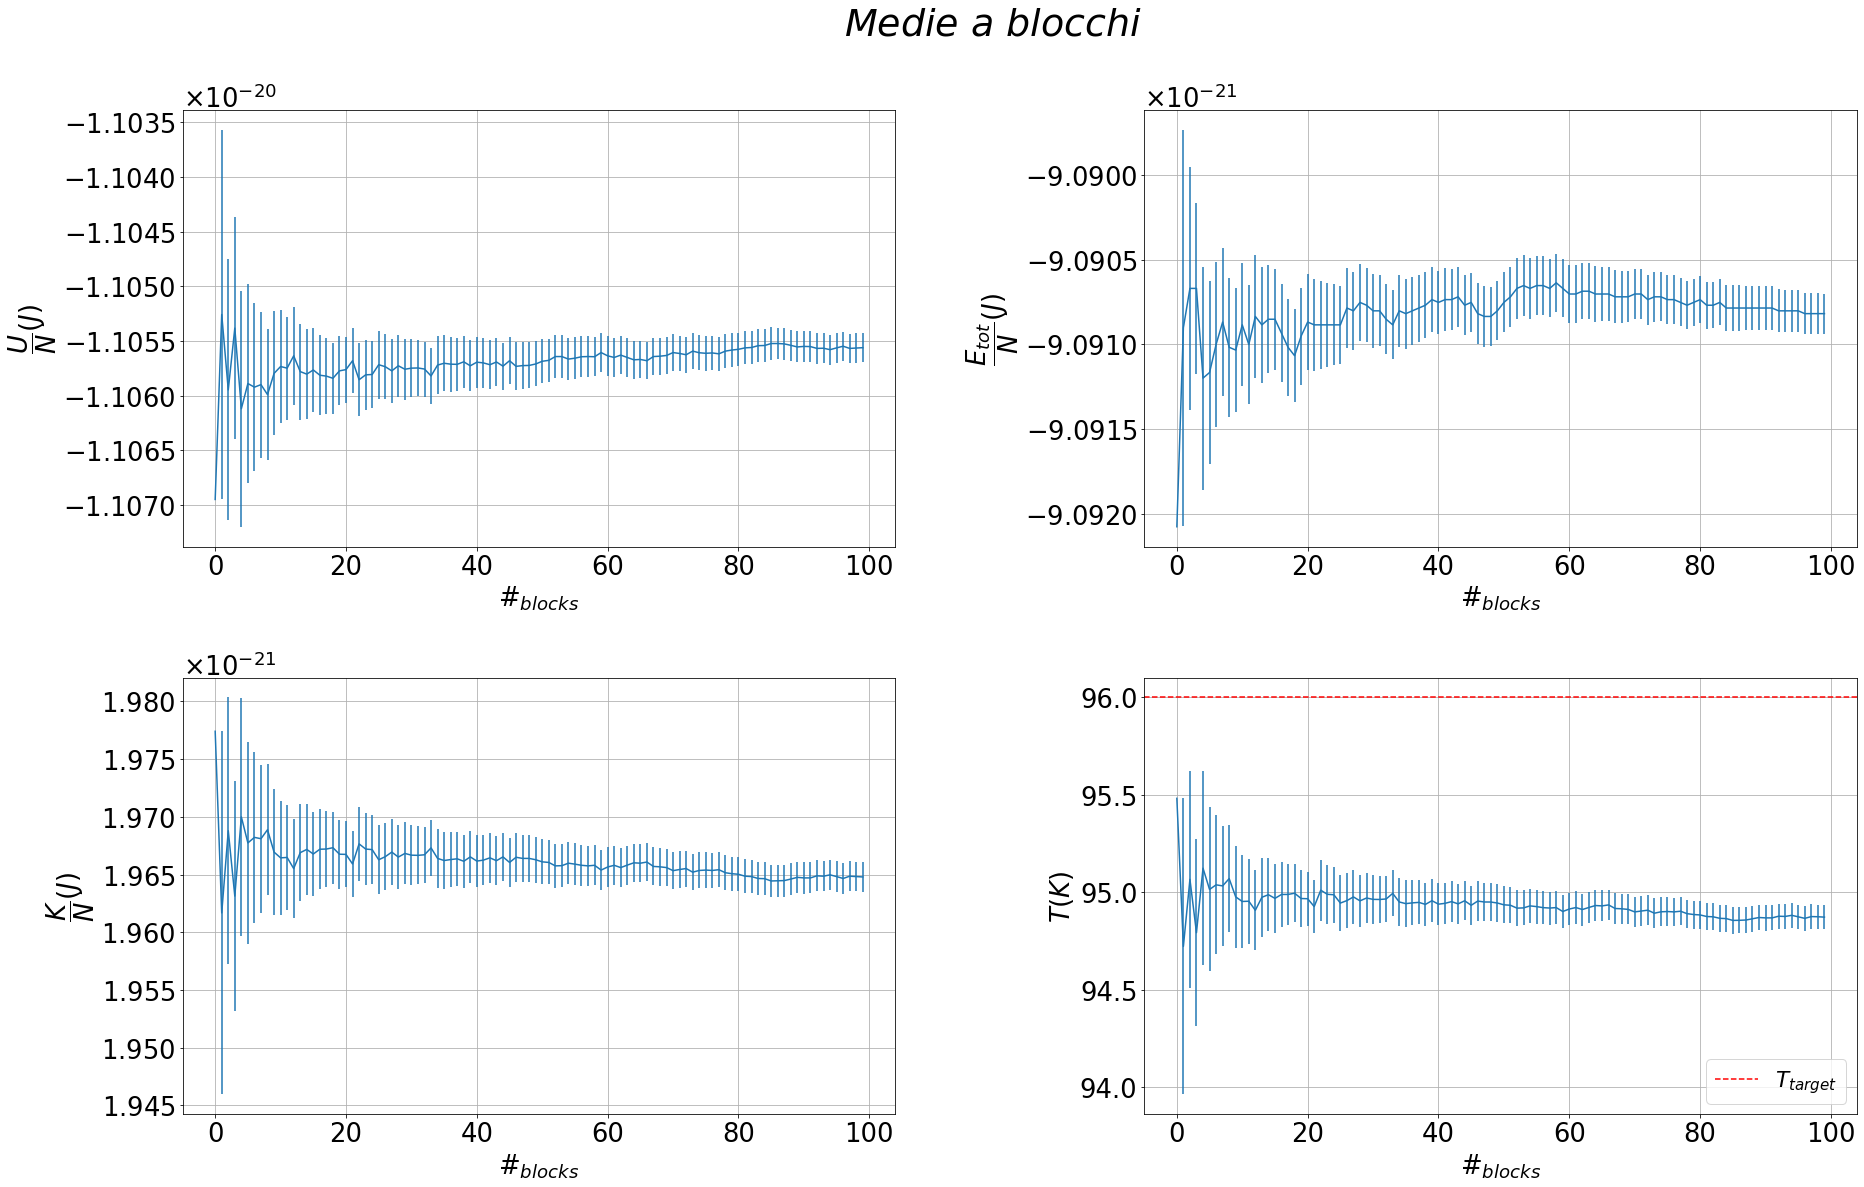

In [6]:
plt.figure(figsize=(30,18))

#Plot in SI

plt.subplot(2,2,1) 
x, pot, errp= np.loadtxt("MolecularDynamics/Solid/ave_epot5.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,pot*epsilon,yerr=errp*epsilon)
plt.ylabel('$\\dfrac{U}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,3)
x, kin, errk= np.loadtxt("MolecularDynamics/Solid/ave_ekin5.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,kin*epsilon,yerr=errk*epsilon)
plt.ylabel('$ \\dfrac{K}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,2)
x, etot, erret= np.loadtxt("MolecularDynamics/Solid/ave_etot5.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,etot*epsilon,yerr=erret*epsilon)
plt.ylabel('$ \\dfrac{E_{tot}}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,4)
x, temp, errtm= np.loadtxt("MolecularDynamics/Solid/ave_temp5.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,temp*epsilon_kb,yerr=errtm*epsilon_kb)
plt.axhline(y=0.8*epsilon_kb, label="$T_{target}$", color='red', linestyle='dashed')
plt.ylabel('$T$$(K)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.legend(loc='lower right')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.suptitle('$Medie$ $a$ $blocchi$', fontsize=38)
plt.subplots_adjust(top=0.9, wspace=0.35, hspace=0.3)


plt.show()

Dai grafici è possibile vedere che con l'aumentare dei blocchi l'incertezza sulla misura diminuisce. Dal grafico della temperatura vediamo che il sistema non è esattamente alla temperatura target, probabilmente con qualche equilibrazione in più è possibile arrivare a risultati migliori per l'equilibrazione.

#### 2. Fase liquida

Per la fase liquida consideriamo come configurazione iniziale quella ottenuta dall'ultima simulazione fatta per lo stato solido, salviamo dunque le coordinate di $old.0$ del solido nel file $config.0$ del liquido. Equilibriamo poi il sistema con vari restart. 

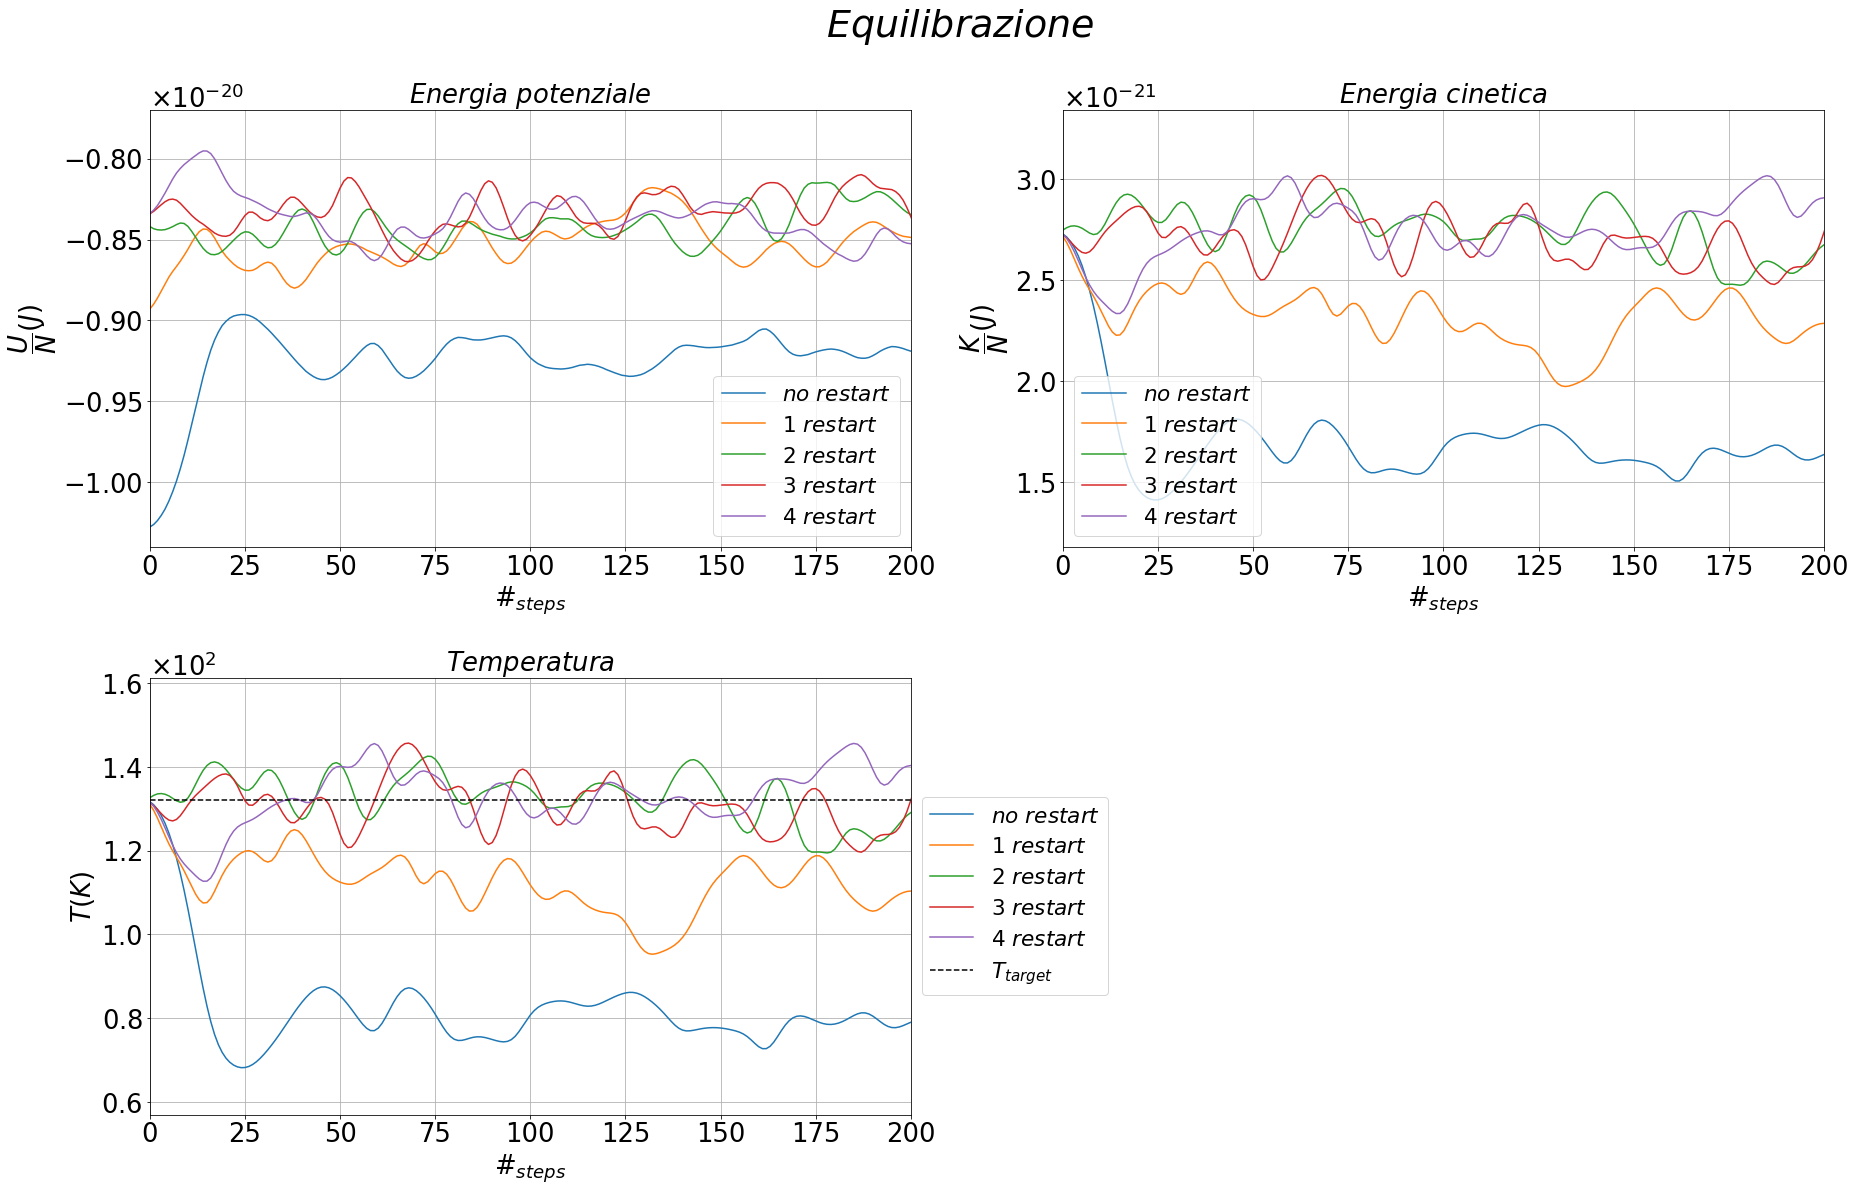

In [7]:
plt.figure(figsize=(30,18))


pot= np.loadtxt("MolecularDynamics/Liquid/output_epot0.dat", usecols=(0), delimiter=' ', unpack='true')
pot1= np.loadtxt("MolecularDynamics/Liquid/output_epot1.dat", usecols=(0), delimiter=' ', unpack='true')
pot2= np.loadtxt("MolecularDynamics/Liquid/output_epot2.dat", usecols=(0), delimiter=' ', unpack='true')
pot3= np.loadtxt("MolecularDynamics/Liquid/output_epot3.dat", usecols=(0), delimiter=' ', unpack='true')
pot4= np.loadtxt("MolecularDynamics/Liquid/output_epot4.dat", usecols=(0), delimiter=' ', unpack='true')

kin= np.loadtxt("MolecularDynamics/Liquid/output_ekin0.dat", usecols=(0), delimiter=' ', unpack='true')
kin1= np.loadtxt("MolecularDynamics/Liquid/output_ekin1.dat", usecols=(0), delimiter=' ', unpack='true')
kin2= np.loadtxt("MolecularDynamics/Liquid/output_ekin2.dat", usecols=(0), delimiter=' ', unpack='true')
kin3= np.loadtxt("MolecularDynamics/Liquid/output_ekin3.dat", usecols=(0), delimiter=' ', unpack='true')
kin4= np.loadtxt("MolecularDynamics/Liquid/output_ekin4.dat", usecols=(0), delimiter=' ', unpack='true')

temp= np.loadtxt("MolecularDynamics/Liquid/output_temp0.dat", usecols=(0), delimiter=' ', unpack='true')
temp1= np.loadtxt("MolecularDynamics/Liquid/output_temp1.dat", usecols=(0), delimiter=' ', unpack='true')
temp2= np.loadtxt("MolecularDynamics/Liquid/output_temp2.dat", usecols=(0), delimiter=' ', unpack='true')
temp3= np.loadtxt("MolecularDynamics/Liquid/output_temp3.dat", usecols=(0), delimiter=' ', unpack='true')
temp4= np.loadtxt("MolecularDynamics/Liquid/output_temp4.dat", usecols=(0), delimiter=' ', unpack='true')


plt.subplot(2,2,1)

plt.plot(pot*epsilon, label='$no$ $restart$')
plt.plot(pot1*epsilon, label='$1$ $restart$')
plt.plot(pot2*epsilon, label='$2$ $restart$')
plt.plot(pot3*epsilon, label='$3$ $restart$')
plt.plot(pot4*epsilon, label='$4$ $restart$')
plt.xlabel("$\#_{steps}$")
plt.ylabel("$\\dfrac{U}{N}$$(J)$")
plt.title("$Energia$ $potenziale$")
plt.xlim(0,200)
plt.grid()
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,2)

plt.plot(kin*epsilon, label='$no$ $restart$')
plt.plot(kin1*epsilon, label='$1$ $restart$')
plt.plot(kin2*epsilon, label='$2$ $restart$')
plt.plot(kin3*epsilon, label='$3$ $restart$')
plt.plot(kin4*epsilon, label='$4$ $restart$')
plt.xlabel("$\#_{steps}$")
plt.ylabel('$\\dfrac{K}{N}$$(J)$')
plt.title("$Energia$ $cinetica$")
plt.xlim(0,200)
plt.grid()
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,3)

plt.plot(temp*epsilon_kb, label='$no$ $restart$')
plt.plot(temp1*epsilon_kb, label='$1$ $restart$')
plt.plot(temp2*epsilon_kb, label='$2$ $restart$')
plt.plot(temp3*epsilon_kb, label='$3$ $restart$')
plt.plot(temp4*epsilon_kb, label='$4$ $restart$')
plt.axhline(y=1.1*epsilon_kb, label="$T_{target}$", color='black', linestyle='dashed')
plt.xlabel("$\#_{steps}$")
plt.ylabel('$T(K)$')
plt.title("$Temperatura$")
plt.xlim(0,200)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)



plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)

plt.suptitle("$Equilibrazione$", fontsize=38)

plt.show()

Dai grafici vediamo che una buona l'equilibrazione si ottiene già a partire dal secondo restart. Decidiamo di calcolare le medie di blocco ottenute con i valori del terzo restart. 

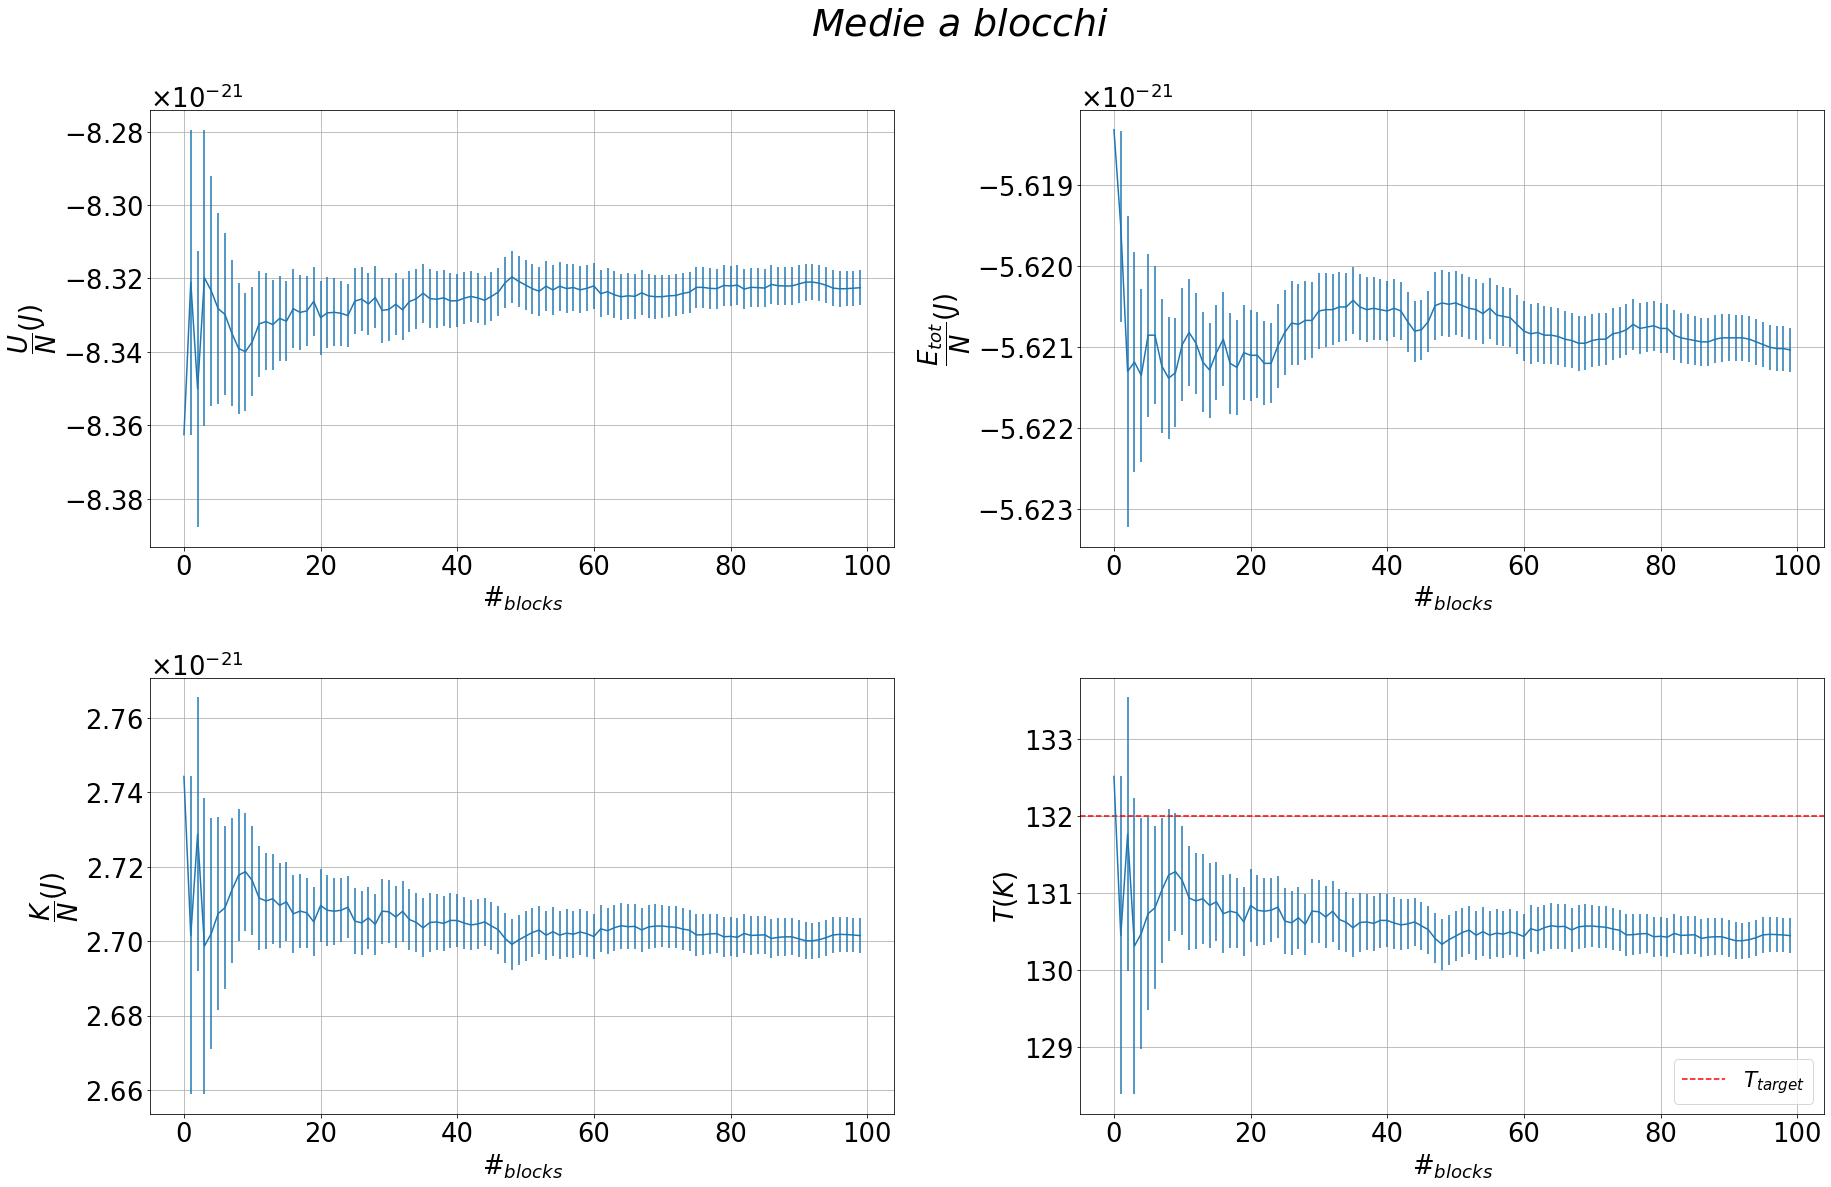

In [20]:
plt.figure(figsize=(30,18))

#Plot in SI

plt.subplot(2,2,1)   
x, pot, errp= np.loadtxt("MolecularDynamics/Liquid/ave_epot3.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,pot*epsilon,yerr=errp*epsilon)
plt.ylabel('$\\dfrac{U}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,3)
x, kin, errk= np.loadtxt("MolecularDynamics/Liquid/ave_ekin3.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,kin*epsilon,yerr=errk*epsilon)
plt.ylabel('$\\dfrac{K}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,2)
x, etot, erret= np.loadtxt("MolecularDynamics/Liquid/ave_etot3.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,etot*epsilon,yerr=erret*epsilon)
plt.ylabel('$\\dfrac{E_{tot}}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,4)
x, temp, errtm= np.loadtxt("MolecularDynamics/Liquid/ave_temp3.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,temp*epsilon_kb,yerr=errtm*epsilon_kb)
plt.axhline(y=1.1*epsilon_kb, label="$T_{target}$", color='red', linestyle='dashed')
plt.ylabel('$T(K)$')
plt.xlabel('$\#_{blocks}$')
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('$Medie$ $a$ $blocchi$', fontsize=38)
plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.3)


plt.show()

Anche in questo caso la temperatura del sistema non raggiunge la temperatura target del sistema, è vicina ma le barre di errore non coprono il valore target. 

#### 3. Fase gassosa

Per la fase gassosa leggiamo le configurazioni iniziali copiando nel file $config.0$ le configurazioni ottenute dall'ultima simulazione effettuata per la fase liquida che si trovano in $old.0$. Equilibriamo poi il sistema.

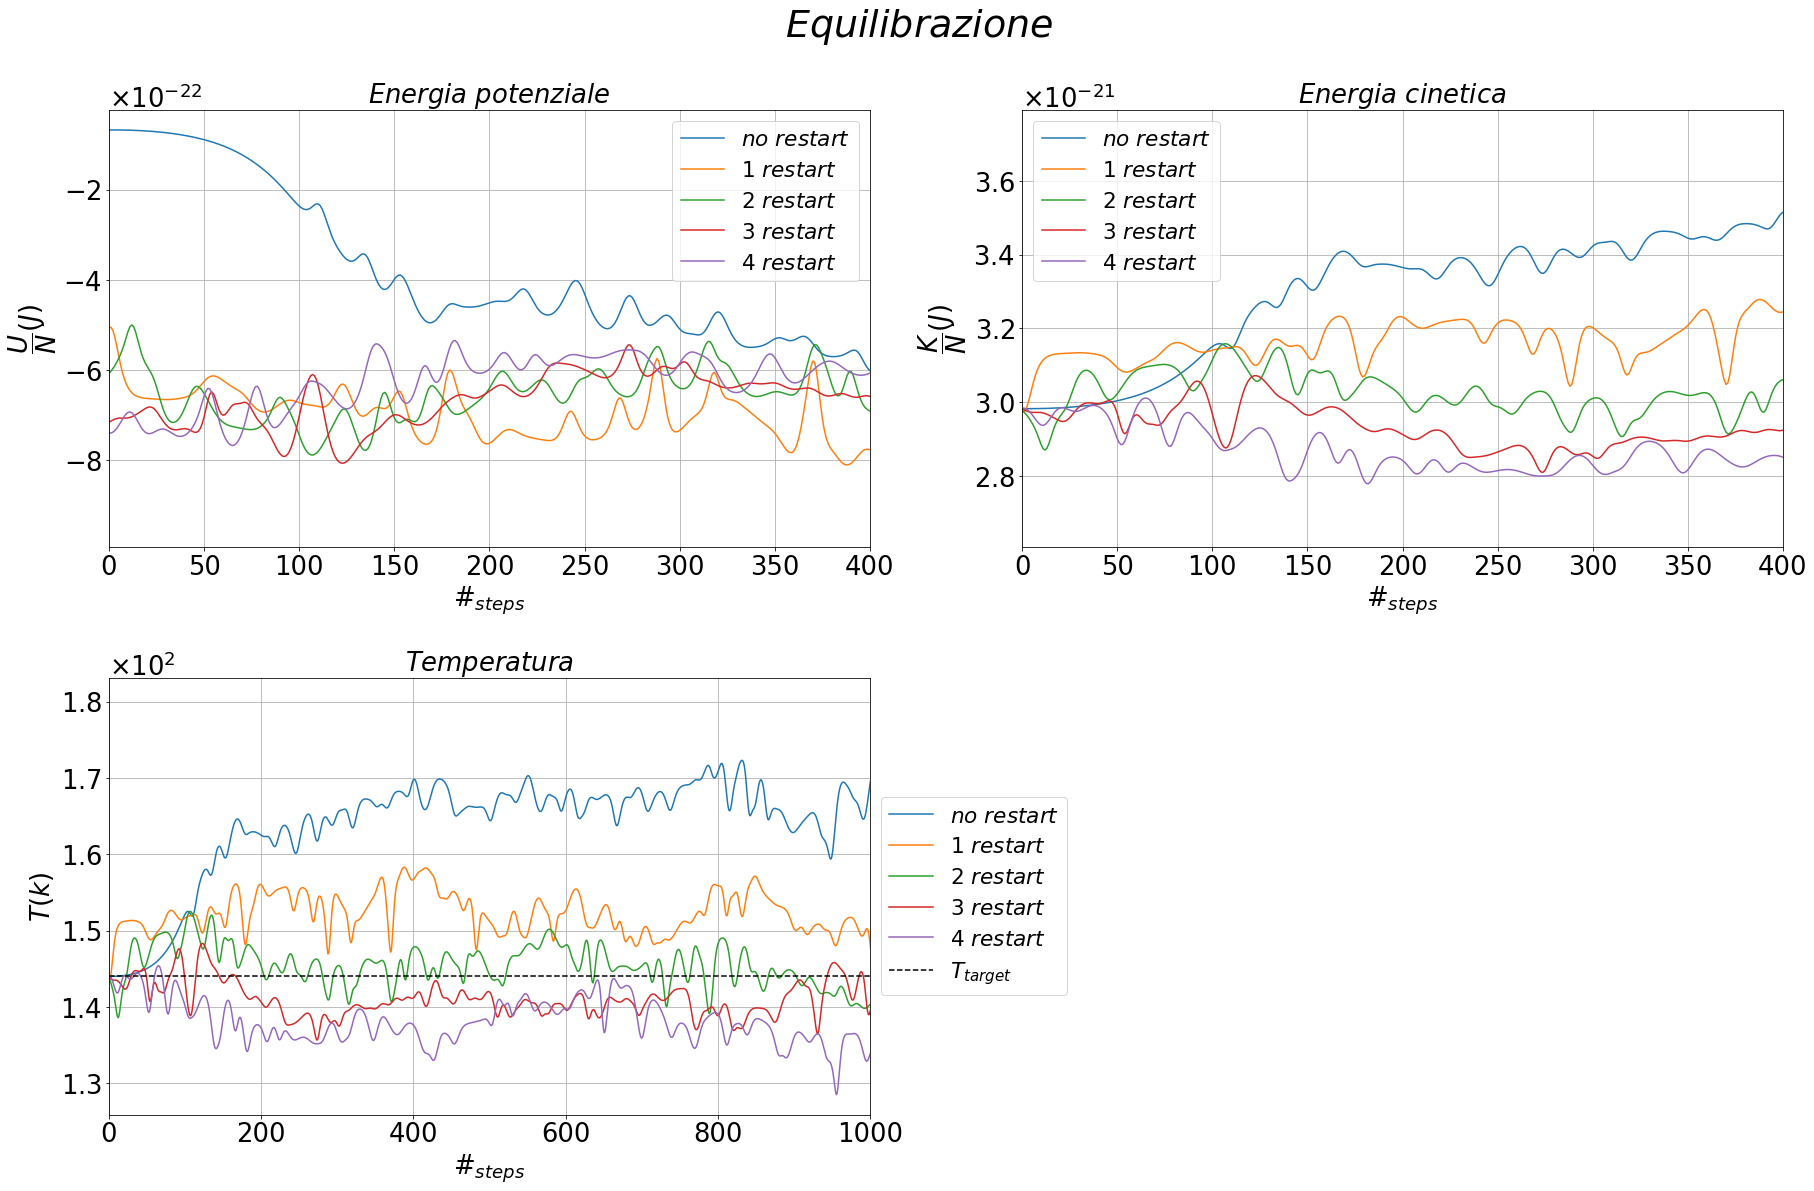

In [10]:
plt.figure(figsize=(30,18))


pot= np.loadtxt("MolecularDynamics/Gas/output_epot0.dat", usecols=(0), delimiter=' ', unpack='true')
pot1= np.loadtxt("MolecularDynamics/Gas/output_epot1.dat", usecols=(0), delimiter=' ', unpack='true')
pot2= np.loadtxt("MolecularDynamics/Gas/output_epot2.dat", usecols=(0), delimiter=' ', unpack='true')
pot3= np.loadtxt("MolecularDynamics/Gas/output_epot3.dat", usecols=(0), delimiter=' ', unpack='true')
pot4= np.loadtxt("MolecularDynamics/Gas/output_epot4.dat", usecols=(0), delimiter=' ', unpack='true')

kin= np.loadtxt("MolecularDynamics/Gas/output_ekin0.dat", usecols=(0), delimiter=' ', unpack='true')
kin1= np.loadtxt("MolecularDynamics/Gas/output_ekin1.dat", usecols=(0), delimiter=' ', unpack='true')
kin2= np.loadtxt("MolecularDynamics/Gas/output_ekin2.dat", usecols=(0), delimiter=' ', unpack='true')
kin3= np.loadtxt("MolecularDynamics/Gas/output_ekin3.dat", usecols=(0), delimiter=' ', unpack='true')
kin4= np.loadtxt("MolecularDynamics/Gas/output_ekin4.dat", usecols=(0), delimiter=' ', unpack='true')


temp= np.loadtxt("MolecularDynamics/Gas/output_temp0.dat", usecols=(0), delimiter=' ', unpack='true')
temp1= np.loadtxt("MolecularDynamics/Gas/output_temp1.dat", usecols=(0), delimiter=' ', unpack='true')
temp2= np.loadtxt("MolecularDynamics/Gas/output_temp2.dat", usecols=(0), delimiter=' ', unpack='true')
temp3= np.loadtxt("MolecularDynamics/Gas/output_temp3.dat", usecols=(0), delimiter=' ', unpack='true')
temp4= np.loadtxt("MolecularDynamics/Gas/output_temp4.dat", usecols=(0), delimiter=' ', unpack='true')


plt.subplot(2,2,1)

plt.plot(pot*epsilon, label='$no$ $restart$')
plt.plot(pot1*epsilon, label='$1$ $restart$')
plt.plot(pot2*epsilon, label='$2$ $restart$')
plt.plot(pot3*epsilon, label='$3$ $restart$')
plt.plot(pot4*epsilon, label='$4$ $restart$')
plt.xlabel("$\#_{steps}$")
plt.ylabel("$\\dfrac{U}{N}$$(J)$")
plt.title("$Energia$ $potenziale$")
plt.xlim(0,400)
plt.grid()
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,2)

plt.plot(kin*epsilon, label='$no$ $restart$')
plt.plot(kin1*epsilon, label='$1$ $restart$')
plt.plot(kin2*epsilon, label='$2$ $restart$')
plt.plot(kin3*epsilon, label='$3$ $restart$')
plt.plot(kin4*epsilon, label='$4$ $restart$')
plt.xlabel("$\#_{steps}$")
plt.ylabel('$\\dfrac{K}{N}$$(J)$')
plt.title("$Energia$ $cinetica$")
plt.xlim(0,400)
plt.grid()
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,3)

plt.plot(temp*epsilon_kb, label='$no$ $restart$')
plt.plot(temp1*epsilon_kb, label='$1$ $restart$')
plt.plot(temp2*epsilon_kb, label='$2$ $restart$')
plt.plot(temp3*epsilon_kb, label='$3$ $restart$')
plt.plot(temp4*epsilon_kb, label='$4$ $restart$')
plt.axhline(y=1.2*epsilon_kb, label="$T_{target}$", color='black', linestyle='dashed')
plt.xlabel("$\#_{steps}$")
plt.ylabel('$T(k)$')
plt.title("$Temperatura$")
plt.xlim(0,1000)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)

plt.suptitle("$Equilibrazione$", fontsize=38)

plt.show()


Dai grafici vediamo che dal terzo restart il sistema è equilibrato. Scegliamo di calcolare le medie a blocchi utilizzando i valori istantanei ottenuti con il secondo restart.

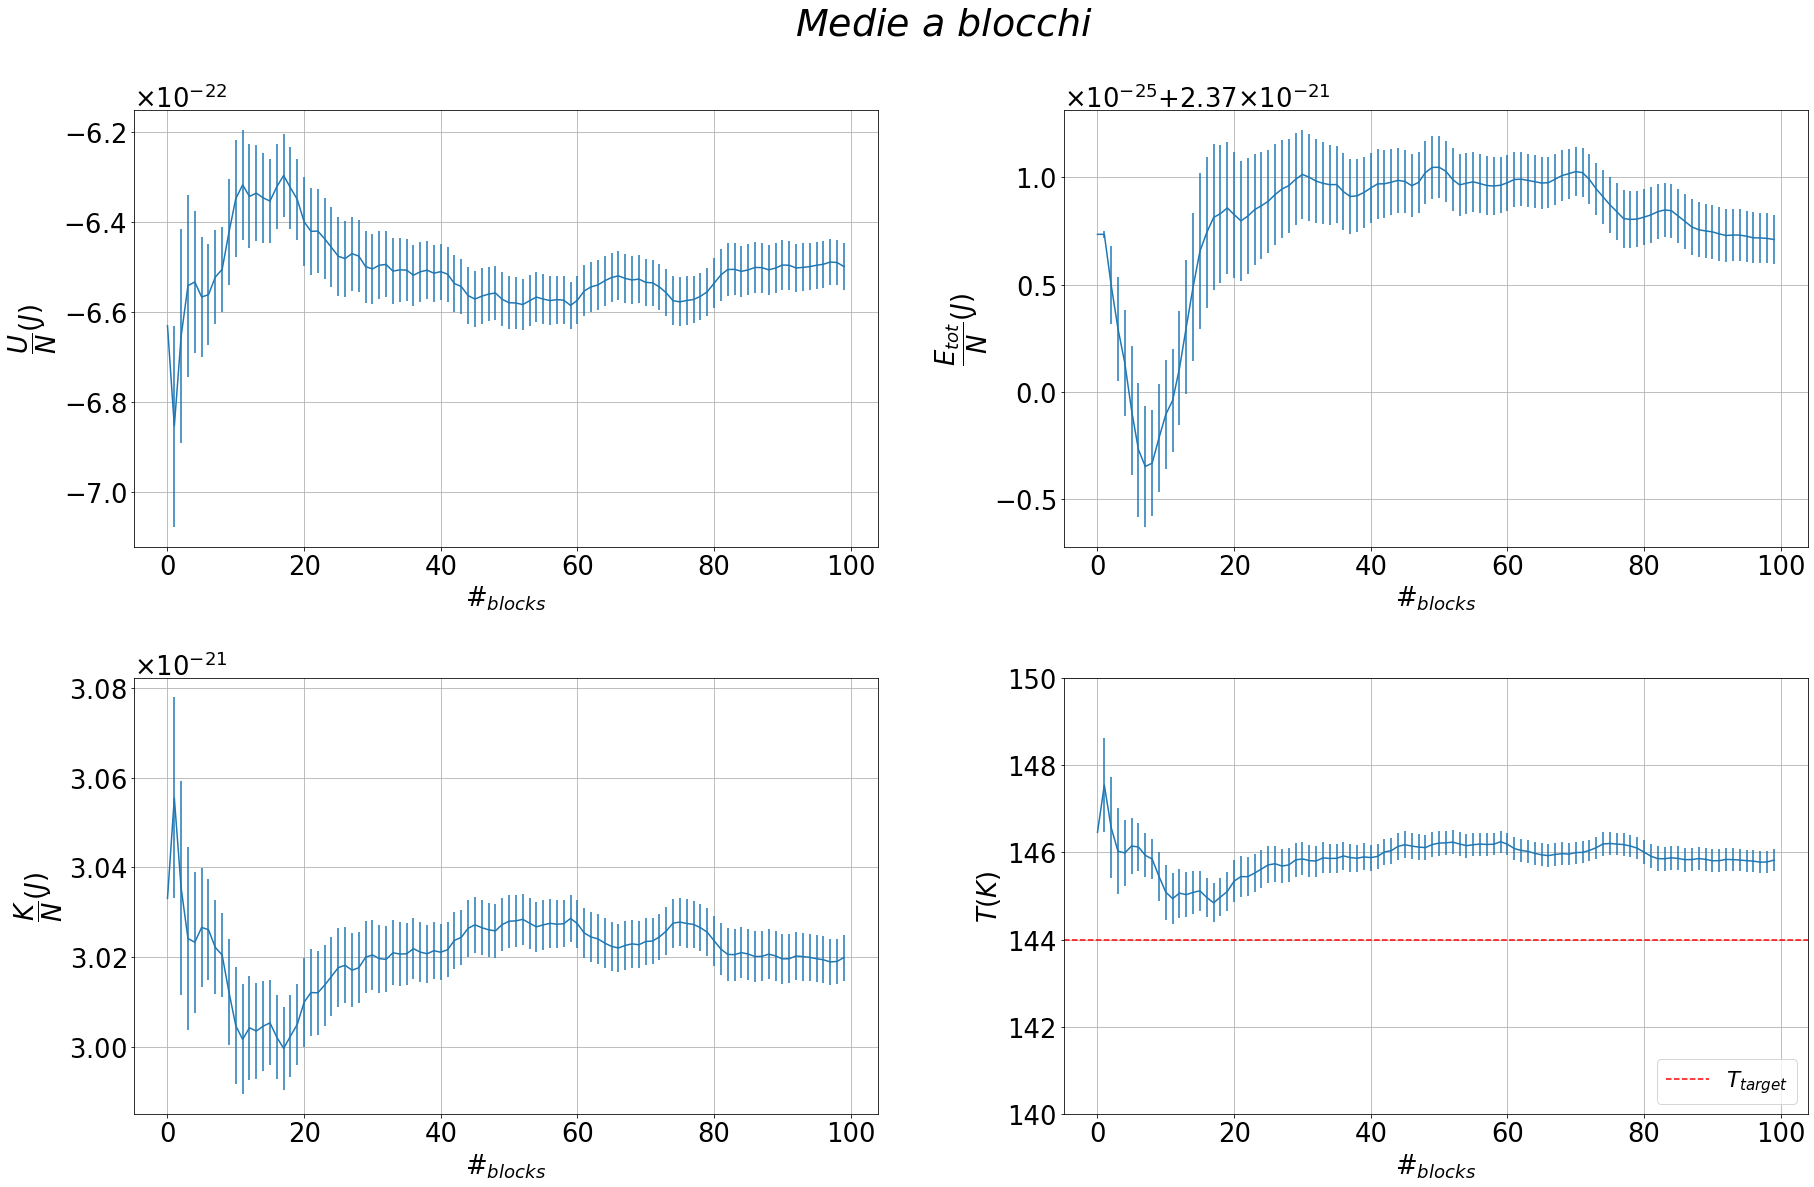

In [18]:
plt.figure(figsize=(30,18))

#Plot in SI

plt.subplot(2,2,1)  
x, pot, errp= np.loadtxt("MolecularDynamics/Gas/ave_epot2.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,pot*epsilon,yerr=errp*epsilon)
plt.ylabel('$\\dfrac{U}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,3)
x, kin, errk= np.loadtxt("MolecularDynamics/Gas/ave_ekin2.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,kin*epsilon,yerr=errk*epsilon)
plt.ylabel('$\\dfrac{K}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,2)
x, etot, erret= np.loadtxt("MolecularDynamics/Gas/ave_etot2.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,etot*epsilon,yerr=erret*epsilon)
plt.ylabel('$\\dfrac{E_{tot}}{N}$$(J)$')
plt.xlabel('$\#_{blocks}$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


plt.subplot(2,2,4)
x, temp, errtm= np.loadtxt("MolecularDynamics/Gas/ave_temp2.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,temp*epsilon_kb,yerr=errtm*epsilon_kb)
plt.axhline(y=1.2*epsilon_kb, label="$T_{target}$", color='red', linestyle='dashed')
plt.ylim(140,150)
plt.ylabel('$T(K)$')
plt.xlabel('$\#_{blocks}$')
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('$Medie$ $a$ $blocchi$', fontsize=38)
plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.3)


plt.show()

Come nelle fasi precedenti la temperatura target del sistema non è raggiunta dalle barre di errore calcolate con la media a blocchi.

Riscontriamo che, come ci si aspetta analizzando sistemi che passano dallo stato solido a quello gassoso, l'energia cinetica per particella aumenta mentre l'energia potenziale diminuisce.